##### Importing and analysing the data set

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [2]:
pwd

'C:\\Users\\Asus'

In [3]:
import os

In [4]:
os.chdir(r'C:\Users\Asus\Downloads')

In [5]:
pwd

'C:\\Users\\Asus\\Downloads'

In [6]:
df = pd.read_csv('Dblogtext.csv')

In [7]:
print(df.shape)
print(df.columns)
df.sample(10)

(681284, 7)
Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')


,id,gender,age,topic,sign,date,text
332350,1310522,female,26,Communications-Media,Sagittarius,"13,Junho,2004",After a little prodding from a friendly...
664841,1270648,female,23,indUnk,Scorpio,"30,October,2002",In case someone would like to make ...
178123,3768025,female,26,Arts,Pisces,"27,June,2004","In the beginning, there was Heaven and Eart..."
544868,3206308,male,34,indUnk,Aries,"05,May,2004",What a brilliant day in the NBA playoff...
1774,589736,male,35,Technology,Aries,"05,August,2004",Will there be cuisine for us carniv...
512508,1739757,female,26,indUnk,Sagittarius,"29,December,2003",Have been reading more of urlLin...
270416,3552275,male,17,Non-Profit,Aries,"12,juni,2004",Yay! One week old already! Didimon ...
372790,1234212,male,27,indUnk,Taurus,"07,April,2003",I must update...I must update...I must ...
381833,4064814,male,24,Student,Capricorn,"10,August,2004",Saw a great show on Friday at The Ford ...
345802,2283987,female,23,Communications-Media,Capricorn,"01,April,2004",While flipping through the channels yes...


##### Taking a sample of data to build a model as it is not possible to run 6 lakh records on local machine for now..

In [8]:
data=df.sample(10000)
data.shape

(10000, 7)

###### setting empty strings ,'' and numpy.inf as NA values and checking for null values 

In [9]:
#setting empty strings ,'' and numpy.inf as NA values and checking for null values 
pd.options.mode.use_inf_as_na = True

data.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

###### No null values have been found
###### checking different attributes of new data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 394382 to 216473
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10000 non-null  int64 
 1   gender  10000 non-null  object
 2   age     10000 non-null  int64 
 3   topic   10000 non-null  object
 4   sign    10000 non-null  object
 5   date    10000 non-null  object
 6   text    10000 non-null  object
dtypes: int64(2), object(5)
memory usage: 625.0+ KB


In [11]:
data.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

##### Sample of data is used only ; so that it works properly in the machine and consume less running time for codes

###### Checking distribution of various attributes of data

##### AGE

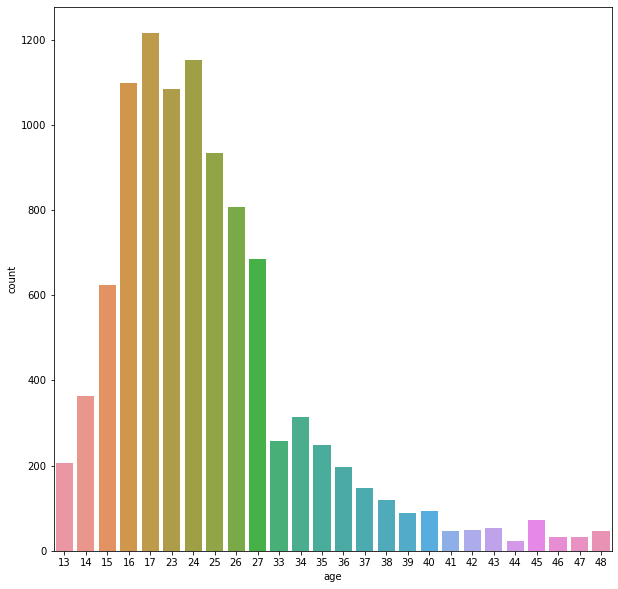

17    1216
24    1153
16    1098
23    1085
25     935
26     807
27     685
15     624
14     364
34     315
33     259
35     248
13     207
36     196
37     147
38     120
40      94
39      89
45      73
43      54
42      48
41      47
48      46
46      33
47      33
44      24
Name: age, dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots( figsize=(10,10))
sns.countplot(x=data['age'],ax=ax)
plt.show()
data['age'].value_counts()

###### GENDER

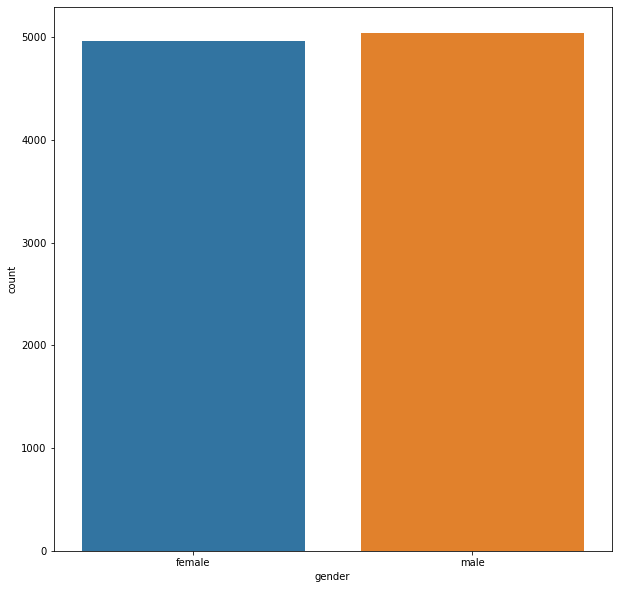

male      5038
female    4962
Name: gender, dtype: int64

In [13]:
fig, ax = plt.subplots( figsize=(10,10))
sns.countplot(x=data['gender'],ax=ax)
plt.show()
data['gender'].value_counts()

###### TOPIC

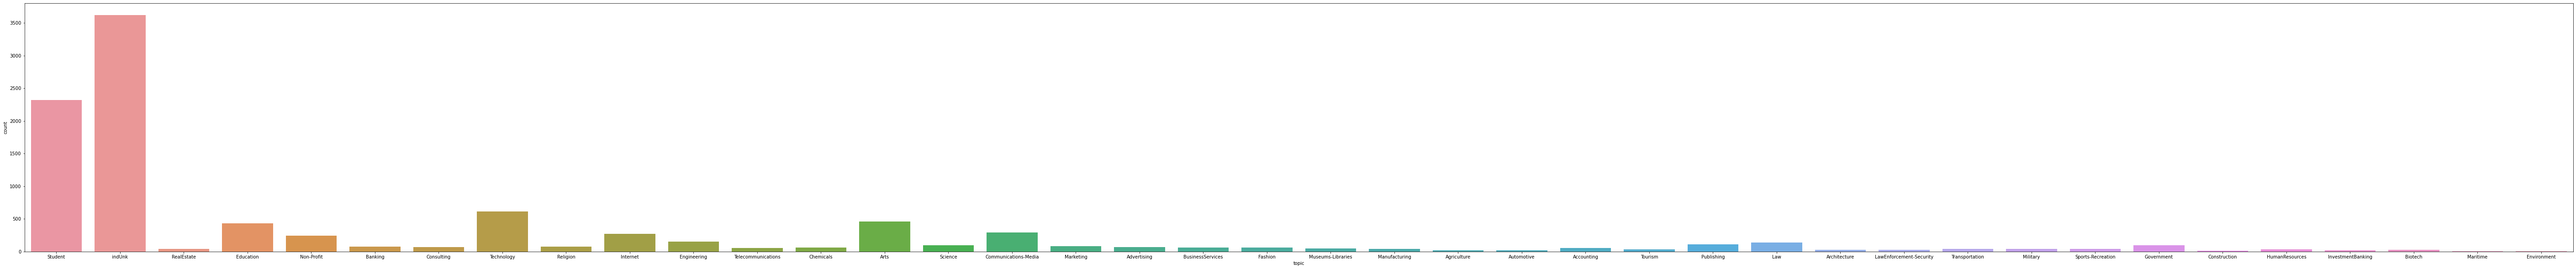

indUnk                     3619
Student                    2320
Technology                  615
Arts                        460
Education                   434
Communications-Media        290
Internet                    270
Non-Profit                  241
Engineering                 149
Law                         139
Publishing                  112
Science                      94
Government                   93
Marketing                    84
Religion                     75
Banking                      74
Consulting                   72
Advertising                  70
Fashion                      65
Chemicals                    61
BusinessServices             59
Telecommunications           58
Accounting                   52
Museums-Libraries            49
Military                     44
Transportation               43
RealEstate                   42
Sports-Recreation            40
Manufacturing                38
HumanResources               37
Tourism                      32
Biotech 

In [14]:
fig, ax = plt.subplots( figsize=(100,10))
sns.countplot(x=data['topic'],ax=ax)
plt.show()
data['topic'].value_counts()

###### SIGN

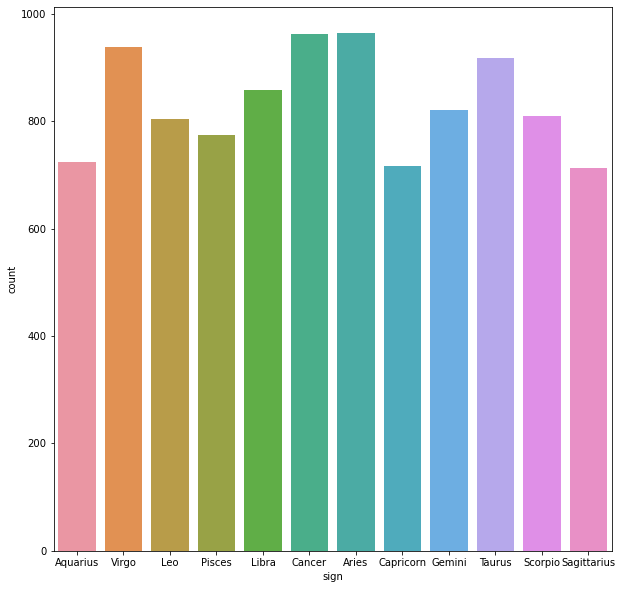

Aries          964
Cancer         962
Virgo          938
Taurus         917
Libra          858
Gemini         821
Scorpio        809
Leo            804
Pisces         775
Aquarius       724
Capricorn      716
Sagittarius    712
Name: sign, dtype: int64

In [15]:
fig, ax = plt.subplots( figsize=(10,10))
sns.countplot(x=data['sign'],ax=ax)
plt.show()
data['sign'].value_counts()

###### DATE

In [16]:
data['date'].value_counts()

02,August,2004       237
01,August,2004       204
03,August,2004       155
05,August,2004       139
04,August,2004       124
                    ... 
20,December,2003       1
26,September,2002      1
16,November,2002       1
07,September,2002      1
25,April,2002          1
Name: date, Length: 941, dtype: int64

In [17]:
data['text'].nunique()

9934

In [18]:
df.pivot_table(index=['topic','gender'],values=['text'], aggfunc='count').T

topic  Accounting      Advertising       Agriculture      Architecture       \
gender     female male      female  male      female male       female male   
text         3227  605        2363  2313         685  550          848  790   

topic    Arts         ... Technology        Telecommunications       Tourism  \
gender female   male  ...     female   male             female  male  female   
text    18947  13502  ...       6323  35732               1551  2340    1072   

topic       Transportation        indUnk          
gender male         female  male  female    male  
text    870            670  1656  146059  104956  

[1 rows x 80 columns]

In [19]:
df.pivot_table(index=['age','gender'],values=['text'], aggfunc='count').T

age        13           14            15            16            17         \
gender female  male female   male female   male female   male female   male   
text     6309  6824  16588  10812  21870  19897  35214  37494  35408  45451   

age     ...     44           45           46          47          48        
gender  ... female  male female  male female male female male female  male  
text    ...    453  1591   2164  2318   2235  498   1432  775   2270  1302  

[1 rows x 52 columns]

In [20]:
df.pivot_table(index=['age'],columns=['topic'],values=['text'], aggfunc='count').replace(np.nan,0).T

age                               13       14       15       16       17  \
     topic                                                                 
text Accounting                  0.0      0.0     75.0     79.0    158.0   
     Advertising                11.0      0.0     21.0     12.0     65.0   
     Agriculture                 0.0     73.0     85.0    119.0     82.0   
     Architecture                0.0     33.0     68.0     13.0     25.0   
     Arts                      167.0   1205.0   1313.0   2249.0   1375.0   
     Automotive                  0.0     28.0     29.0     14.0    141.0   
     Banking                     2.0      0.0      0.0     17.0    116.0   
     Biotech                   109.0    136.0    285.0    131.0     82.0   
     BusinessServices            0.0     14.0     18.0    184.0    173.0   
     Chemicals                  21.0     32.0    369.0    522.0     96.0   
     Communications-Media        8.0    227.0    151.0   1221.0    629.0   
     Construction                0.0      0.0      3.0     29.0      4.0   
     Consulting                425.0    124.0      0.0     20.0    313.0   
     Education                 370.0   1185.0   1547.0   1115.0   1948.0   
     Engineering                 0.0      0.0     13.0    117.0    483.0   
     Environment                 0.0     83.0      4.0      9.0      0.0   
     Fashion                     5.0     22.0    118.0    307.0    408.0   
     Government                  4.0     19.0    262.0     49.0    553.0   
     HumanResources              0.0    345.0     67.0     94.0    140.0   
     Internet                  346.0    138.0    135.0    249.0    378.0   
     InvestmentBanking           0.0      0.0     18.0     67.0      0.0   
     Law                         9.0      6.0     47.0     60.0    109.0   
     LawEnforcement-Security     0.0     23.0     99.0     84.0    463.0   
     Manufacturing              22.0      0.0      0.0      3.0     21.0   
     Maritime                    0.0      7.0     28.0     27.0     52.0   
     Marketing                   0.0      0.0      0.0     15.0    151.0   
     Military                   96.0    146.0    152.0    191.0    335.0   
     Museums-Libraries          30.0     91.0     37.0     67.0     29.0   
     Non-Profit                130.0    340.0    878.0    428.0   4881.0   
     Publishing                  0.0      0.0     24.0     72.0     96.0   
     RealEstate                  3.0      0.0     72.0      5.0    525.0   
     Religion                    4.0     30.0    147.0    543.0    474.0   
     Science                   291.0     53.0    185.0    120.0     84.0   
     Sports-Recreation          10.0     48.0    167.0    233.0    822.0   
     Student                  5310.0  13491.0  20681.0  40077.0  37608.0   
     Technology                154.0    129.0    351.0   2233.0   2678.0   
     Telecommunications         15.0     50.0      0.0    162.0     13.0   
     Tourism                     0.0      5.0     46.0    177.0    116.0   
     Transportation              0.0     18.0     13.0     42.0     73.0   
     indUnk                   5591.0   9299.0  14259.0  21552.0  25160.0   

age                                23       24       25       26       27  \
     topic                                                                  
text Accounting                 782.0    541.0    480.0    123.0    146.0   
     Advertising               1501.0    400.0    277.0    664.0    303.0   
     Agriculture                180.0    190.0     40.0    287.0      4.0   
     Architecture               156.0    383.0    268.0    157.0     75.0   
     Arts                      3125.0   6938.0   5231.0   3496.0   1641.0   
     Automotive                  63.0     26.0    300.0     81.0     18.0   
     Banking                    250.0    486.0   2008.0    154.0    541.0   
     Biotech                    176.0    145.0    619.0    181.0     69.0   
     BusinessServices           429.0

In [21]:
df.pivot_table(index=['date'],values=['text'], aggfunc='count').replace(np.nan,0).T

date,",,","01,Agosto,2004","01,April,1999","01,April,2000","01,April,2001","01,April,2002","01,April,2003","01,April,2004","01,August,2000","01,August,2001",...,"31,enero,2003","31,janvier,2004","31,juillet,2004","31,luglio,2004","31,mai,2004","31,mars,2004","31,marzo,2003","31,mayo,2004","31,mei,2004","31,octubre,2003"
text,24,102,1,2,4,30,264,1036,6,32,...,1,3,2,1,2,2,2,6,2,1


###### REMOVING UNWANTED CHARACTERS

In [22]:
import re
data['text']=data['text'].map(lambda s: re.sub('[^a-z\' ]',"",s))

###### CONVERTING TEXT TO LOWER CASE 

In [23]:
data['cleanText']=data['text'].map(lambda s: s.lower())

###### REMOVING UNWANTED SPACES

In [24]:
data['cleanText']=data['cleanText'].map(lambda s: s.strip())

###### REMOVING STOP WORDS

In [25]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
stop_words = stopwords.words('english')
data['cleanText'] = data['cleanText'].apply( lambda t : " ".join( word for word in t.split() 
                                                       if word not in stop_words ) )

###### TARGET/LABEL MERGER AND TRANSFORMATION


##### As  this is a multi-label classification problem, all the labels and columns will be merged  together, so that we have all the labels together for a particular sentence.

In [27]:
data['labels'] = data['gender'] + ',' + data['age'].astype(str) + ',' + data['topic'] + ',' + data['sign']
data['labels'] = data['labels'].map(lambda s: s.split(','))

##### Resetting the new created  data_frame and dropping the unwanted columns.

In [28]:
data.reset_index(inplace=True)
data.drop(columns=['id','gender','age','topic','sign','date','text','index'], inplace=True)

col_name = { 'cleanText':'text', 'labels':'labels'}
data.rename(columns=col_name, inplace=True)

In [29]:
data.sample(10)

,text,labels
4064,urlink arks account online bookstore,"[male, 27, Technology, Gemini]"
9854,spent hour street neighbor checking home brewi...,"[male, 35, indUnk, Scorpio]"
2868,went tanning first time ever today learned gir...,"[female, 25, indUnk, Cancer]"
1683,twiddled thumbs boredom today realized less tw...,"[female, 24, Student, Gemini]"
3608,f sent donation upcoming production know pleas...,"[male, 27, indUnk, Cancer]"
8203,ow tea party midwife pour freezing cold water ...,"[male, 24, Chemicals, Cancer]"
2302,nfortuantly much time post today would like ma...,"[male, 24, Technology, Scorpio]"
3740,ey sugar momma come dance smartest thing ever ...,"[female, 15, indUnk, Scorpio]"
335,'ve always baffled upon weirdness behind omput...,"[male, 17, Student, Sagittarius]"
3647,'ll tell ya ature piss around changes seasons ...,"[female, 46, Consulting, Capricorn]"


###### TEST/TRAIN SPLIT

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = data['text']
y= data['labels']

In [32]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=3)

In [33]:
print('shape of x_train',x_train.shape)
print('shape of y_train',y_train.shape)
print('shape of x_test',x_test.shape)
print('shape of y_test',y_test.shape)

shape of x_train (7000,)
shape of y_train (7000,)
shape of x_test (3000,)
shape of y_test (3000,)


###### VECTORIZATION

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
vec_ters = CountVectorizer(ngram_range=(1,2))
vec_ters.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 2),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

###### Vectorizing training and testing features

In [36]:
x_train_dtm = vec_ters.fit_transform(x_train)

In [37]:
type(x_train_dtm)

scipy.sparse.csr.csr_matrix

In [38]:
x_train_dtm.shape

(7000, 597832)

In [39]:
x_test_dtm = vec_ters.transform(x_test)

In [40]:
x_test_dtm.shape

(3000, 597832)

###### Printing the labels and creating a dictonary with count of each labels

In [41]:
all_labels = []

for sentence in data['labels']:
  for word in sentence:
    all_labels.append(word)

In [42]:
print("all uniques labels:  ",pd.Series(all_labels).unique())
print("counts of labels:    ",pd.Series(all_labels).nunique())

all uniques labels:   ['female' '16' 'Student' 'Aquarius' '24' 'indUnk' 'male' '17' 'RealEstate'
 'Virgo' '26' 'Leo' '25' 'Pisces' 'Libra' '34' 'Cancer' 'Aries' '23'
 'Education' '40' '14' 'Non-Profit' 'Capricorn' '27' 'Gemini' 'Taurus'
 '39' 'Scorpio' 'Banking' '41' 'Consulting' 'Sagittarius' 'Technology'
 'Religion' 'Internet' '13' '36' 'Engineering' 'Telecommunications' '42'
 '45' '43' '15' 'Chemicals' 'Arts' '35' 'Science' 'Communications-Media'
 'Marketing' 'Advertising' 'BusinessServices' 'Fashion'
 'Museums-Libraries' '33' 'Manufacturing' 'Agriculture' '37' 'Automotive'
 'Accounting' 'Tourism' 'Publishing' '48' 'Law' 'Architecture' '38'
 'LawEnforcement-Security' 'Transportation' 'Military' 'Sports-Recreation'
 'Government' '47' 'Construction' '44' 'HumanResources' '46'
 'InvestmentBanking' 'Biotech' 'Maritime' 'Environment']
counts of labels:     80


In [43]:
label_dictonary = pd.Series(all_labels).value_counts().to_dict()
len(label_dictonary)

80

In [44]:
label_dictonary

{'male': 5038,
 'female': 4962,
 'indUnk': 3619,
 'Student': 2320,
 '17': 1216,
 '24': 1153,
 '16': 1098,
 '23': 1085,
 'Aries': 964,
 'Cancer': 962,
 'Virgo': 938,
 '25': 935,
 'Taurus': 917,
 'Libra': 858,
 'Gemini': 821,
 'Scorpio': 809,
 '26': 807,
 'Leo': 804,
 'Pisces': 775,
 'Aquarius': 724,
 'Capricorn': 716,
 'Sagittarius': 712,
 '27': 685,
 '15': 624,
 'Technology': 615,
 'Arts': 460,
 'Education': 434,
 '14': 364,
 '34': 315,
 'Communications-Media': 290,
 'Internet': 270,
 '33': 259,
 '35': 248,
 'Non-Profit': 241,
 '13': 207,
 '36': 196,
 'Engineering': 149,
 '37': 147,
 'Law': 139,
 '38': 120,
 'Publishing': 112,
 'Science': 94,
 '40': 94,
 'Government': 93,
 '39': 89,
 'Marketing': 84,
 'Religion': 75,
 'Banking': 74,
 '45': 73,
 'Consulting': 72,
 'Advertising': 70,
 'Fashion': 65,
 'Chemicals': 61,
 'BusinessServices': 59,
 'Telecommunications': 58,
 '43': 54,
 'Accounting': 52,
 'Museums-Libraries': 49,
 '42': 48,
 '41': 47,
 '48': 46,
 'Military': 44,
 'Transportatio

###### Transforming the labels

In [45]:
from sklearn.preprocessing import MultiLabelBinarizer

In [46]:
MC_binz = MultiLabelBinarizer()

In [47]:
MC_y_train = MC_binz.fit_transform(y_train)

In [48]:
MC_y_train.shape

(7000, 80)

In [49]:
MC_binz.classes_

array(['13', '14', '15', '16', '17', '23', '24', '25', '26', '27', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', 'Accounting', 'Advertising', 'Agriculture',
       'Aquarius', 'Architecture', 'Aries', 'Arts', 'Automotive',
       'Banking', 'Biotech', 'BusinessServices', 'Cancer', 'Capricorn',
       'Chemicals', 'Communications-Media', 'Construction', 'Consulting',
       'Education', 'Engineering', 'Environment', 'Fashion', 'Gemini',
       'Government', 'HumanResources', 'Internet', 'InvestmentBanking',
       'Law', 'LawEnforcement-Security', 'Leo', 'Libra', 'Manufacturing',
       'Maritime', 'Marketing', 'Military', 'Museums-Libraries',
       'Non-Profit', 'Pisces', 'Publishing', 'RealEstate', 'Religion',
       'Sagittarius', 'Science', 'Scorpio', 'Sports-Recreation',
       'Student', 'Taurus', 'Technology', 'Telecommunications', 'Tourism',
       'Transportation', 'Virgo', 'female', 'indUnk', 'male'],
      dtype

In [50]:
pd.DataFrame(MC_y_train, columns=MC_binz.classes_).sample(20)

,13,14,15,16,17,23,24,25,26,27,...,Student,Taurus,Technology,Telecommunications,Tourism,Transportation,Virgo,female,indUnk,male
2314,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,1
4391,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3813,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6556,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3585,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
298,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
6926,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3118,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1860,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [51]:
MC_y_test = MC_binz.transform(y_test)

In [52]:
MC_y_test.shape

(3000, 80)

In [53]:
y_test.iloc[10]

['female', '23', 'Education', 'Aries']

In [54]:
pd.DataFrame(MC_y_test, columns=MC_binz.classes_).sample(10)

,13,14,15,16,17,23,24,25,26,27,...,Student,Taurus,Technology,Telecommunications,Tourism,Transportation,Virgo,female,indUnk,male
156,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1320,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
84,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1140,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
340,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1837,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2432,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1294,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
891,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


#### CLASSIFICATION

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
clf= LogisticRegression(solver='lbfgs',max_iter=50000)
clf=OneVsRestClassifier(clf)

In [56]:
clf.fit(x_train_dtm,MC_y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=50000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [57]:
print ('train_score :',clf.score(x_train_dtm, MC_y_train))
print('test_score :',clf.score(x_test_dtm, MC_y_test))

train_score : 0.912
test_score : 0.003


###### ACCURACY IS VERY LOW BECAUSE WE ARE USING VERY SMALL FRACTION OF DATA..I AM RUNNING FRACTION ONLY  BECAUSE OF NOTEBOOK GETTING CRASHED IF I TRY TO RUN MORE RECORDS.WHEN I TRAINED WITH 5000 RECORDS ACCURACY WAS APPROXIMATELY HALF OF WHAT IT IS WITH 10000 RECORDS.HENCE I CAN SAY THAT THERE ARE GOOD CHANCES THAT ACCURACY TENDS TO IMPROVE IF WE TRAIN WITH MORE DATA.

###### PREDICTIONS

In [58]:
y_predict = clf.predict(x_test_dtm)

In [59]:
print(classification_report(MC_y_test,y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.40      0.05      0.09       125
           2       0.16      0.02      0.03       192
           3       0.25      0.04      0.07       331
           4       0.31      0.04      0.07       362
           5       0.17      0.01      0.02       344
           6       0.13      0.01      0.02       320
           7       0.12      0.01      0.01       299
           8       0.07      0.00      0.01       230
           9       0.00      0.00      0.00       219
          10       0.00      0.00      0.00        74
          11       0.00      0.00      0.00        85
          12       0.00      0.00      0.00        66
          13       0.00      0.00      0.00        51
          14       0.75      0.07      0.13        43
          15       0.00      0.00      0.00        34
          16       0.00      0.00      0.00        25
          17       0.33    

#### PART TWO : CHATBOT

###### IMPORTING NECCESARY LIBRARIES

In [60]:
import io
import random
import string # to process standard python strings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [61]:
from nltk.stem import WordNetLemmatizer
nltk.download('popular', quiet=True)
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [62]:
pwd

'C:\\Users\\Asus\\Downloads'

In [63]:
with open ('Greatlakescorpus.txt') as f:
  text = f.read()

In [64]:
print(text)


Great Lakes Institute of Management (also known as Great Lakes or GLIM) is a private business school in India. It was founded in 2004 by Bala V. Balachandran, a professor at Kellogg School of Management with its first campus in Chennai. 
Great Lakesâ€™ second campus started functioning in Gurgaon, Delhi NCR on 2011. 
Great Lakes offers full-time and executive post graduate programmes in management. Great Lakes offers programs in Marketing, Operations, Finance, Strategy, Data Science, Business Analytics & Cloud Computing. 
These programs are best suited for professional who have good knowledge about programming languages.
Great Lakes was accredited by AMBA, one of the three main global accreditation bodies. 
It has two campuses, one on the outskirts of Chennai and one in Gurgaon, Delhi NCR.
Great Lakes Institute of Management is among the first business schools in India to offer a one year full-time management programme. 
Its one year Post-Graduate Program in Management (PGPM) became t

In [65]:
sentence_list = nltk.sent_tokenize(text)

In [66]:
print(sentence_list)

['\nGreat Lakes Institute of Management (also known as Great Lakes or GLIM) is a private business school in India.', 'It was founded in 2004 by Bala V. Balachandran, a professor at Kellogg School of Management with its first campus in Chennai.', 'Great Lakesâ€™ second campus started functioning in Gurgaon, Delhi NCR on 2011.', 'Great Lakes offers full-time and executive post graduate programmes in management.', 'Great Lakes offers programs in Marketing, Operations, Finance, Strategy, Data Science, Business Analytics & Cloud Computing.', 'These programs are best suited for professional who have good knowledge about programming languages.', 'Great Lakes was accredited by AMBA, one of the three main global accreditation bodies.', 'It has two campuses, one on the outskirts of Chennai and one in Gurgaon, Delhi NCR.', 'Great Lakes Institute of Management is among the first business schools in India to offer a one year full-time management programme.', 'Its one year Post-Graduate Program in M

In [67]:
def greeting_response(text):
  text = text.lower()


  bot_greetings = ['howdy','hi','hello','hola','hey']
  user_greetings = ['hi','hey','hello','hola','greetings','wassup']


  for word in text.split():
    if word in user_greetings:
      return random.choice(bot_greetings)

In [68]:
def index_sort(list_var):
  length = len(list_var)
  list_index = list(range(0,length))

  x = list_var
  for i in range(length):
    for j in range(length):
      if x[list_index[i]] > [list_index[j]]:

        temp = list_index[i]
        list_index[i] = list_index[j]
        list_index[j] = temp

  return list_index    


In [69]:
def bot_response(user_input):
  user_input = user_input.lower()
  sentence_list.append(user_input)
  bot_response = ''
  cm = CountVectorizer().fit_transform(sentence_list)
  similarity_scores = cosine_similarity(cm[-1],cm)
  similarity_scores_list = similarity_scores.flatten()
  index = index_sort(similarity_scores_list)
  index = index[1:]
  response_flag = 0

  j = 0
  for i in range(len(index)):
    if similarity_scores_list[index[i]] > 0.0:
      bot_response = bot_response+''+sentence_list[index[i]]
      response_flag = 1
      j = j+1
    if j > 2:
      break

  if response_flag == 0:
    bot_response = bot_response+''+'I apologize ,i dont understand ,Would you like me to connect you with program executive on this subject.Type bye if u want to exit'

  sentence_list.remove(user_input)

  return bot_response

In [70]:
print('Rios :I am Rios and i will clear your queries about GreatLakes and Programs offered by GreatLakes.if you want to exit bye')

exit_list = ['exit','see you later','bye','quit','break']

while (True):
  user_input = input()
  if user_input.lower() in exit_list:
    print('Rios: chat with you later!')
    break
  else:
    if greeting_response(user_input) != None:
      print('Rios:'+greeting_response(user_input))
    else:
      print('Rios:'+bot_response(user_input))

Rios :I am Rios and i will clear your queries about GreatLakes and Programs offered by GreatLakes.if you want to exit bye
Hi !
Rios:hello
Can you tell me about the courses offered by Great Lakes ?
Rios:Great Lakesâ€™ second campus started functioning in Gurgaon, Delhi NCR on 2011.Great Lakes offers full-time and executive post graduate programmes in management.Great Lakes offers programs in Marketing, Operations, Finance, Strategy, Data Science, Business Analytics & Cloud Computing.
What about the Accredition of Courses ?
Rios:These programs are best suited for professional who have good knowledge about programming languages.Great Lakes was accredited by AMBA, one of the three main global accreditation bodies.It has two campuses, one on the outskirts of Chennai and one in Gurgaon, Delhi NCR.
Are they AICTE approved ?
Rios:Its one year Post-Graduate Program in Management (PGPM) became the first one year full-time management programme to be accredited by Indiaâ€™s higher technical educat